# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
fulldata = pd.merge(mouse_metadata,study_results,on = "Mouse ID")
# Display the data table for preview
fulldata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice.
uniquemice = fulldata["Mouse ID"].nunique()
print(F"The number of unique mice is: {uniquemice}")

The number of unique mice is: 249


In [21]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicatedmice = fulldata.loc[fulldata.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
print(f"Mouse ID's with duplicated time points: {duplicatedmice}")
duplicatedmice[0]

Mouse ID's with duplicated time points: ['g989']


'g989'

In [10]:
# Optional: Get all the data for the duplicate mouse ID. 
dupedata = fulldata.loc[fulldata["Mouse ID"] == duplicatedmice[0]]
dupedata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [25]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleandf = fulldata.loc[fulldata["Mouse ID"] != duplicatedmice[0]]
cleandf.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [26]:
# Checking the number of mice in the clean DataFrame.
newunique = cleandf["Mouse ID"].nunique()
print(f"The number of new unique mouse ID's are: {newunique}")

The number of new unique mouse ID's are: 248


## Summary Statistics

In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summarystat = cleandf.groupby("Drug Regimen")["Tumor Volume (mm3)"]
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
sumdf = pd.DataFrame({
    "Mean":summarystat.mean(),
    "Median":summarystat.median(),
    "Variance":summarystat.var(),
    "Standard Deviation":summarystat.std(),
    "Standard Error":summarystat.sem()
})
sumdf.head()

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [29]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary = cleandf.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
# Using the aggregation method, produce the same summary statistics in a single line
summary.columns = ["Mean ","Median ","Variance","Std. Dev.","Std. Err."]
summary.head()

,Mean,Median,Variance,Std. Dev.,Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

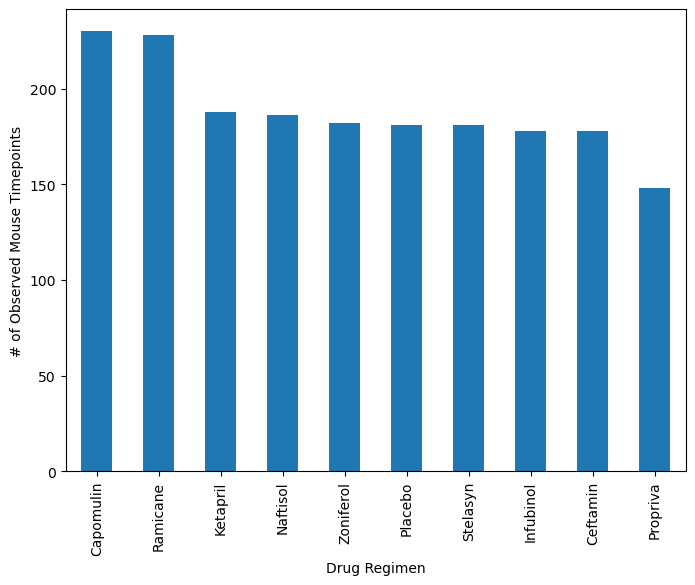

In [30]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_chart_pd = cleandf["Drug Regimen"].value_counts().plot(kind = "bar", figsize =(8,6))
bar_chart_pd.set_xlabel("Drug Regimen")
bar_chart_pd.set_ylabel("# of Observed Mouse Timepoints")

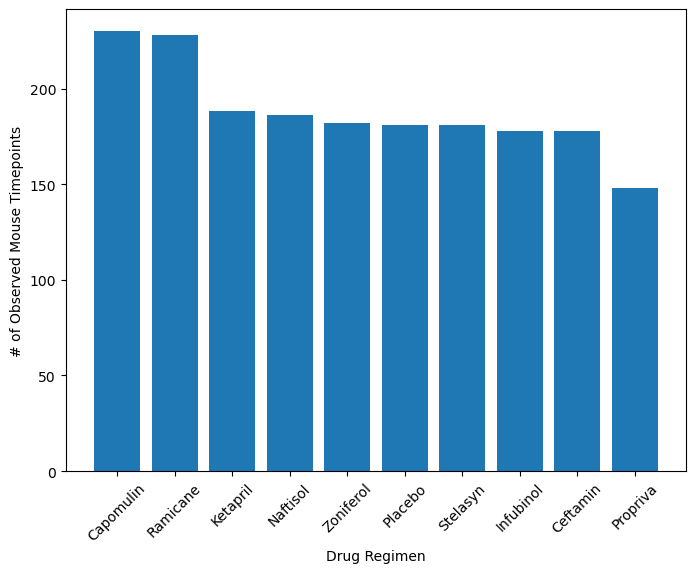

In [32]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drugcount = cleandf["Drug Regimen"].value_counts()
plt.figure(figsize=(8,6))
plt.bar(drugcount.index,drugcount.values)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = 45)
plt.show()

Text(0, 0.5, 'Sex')

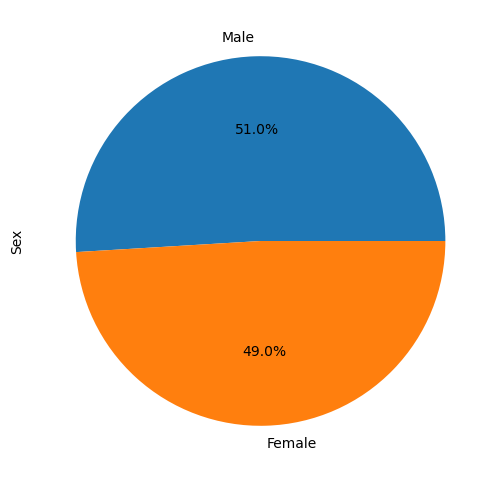

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gendercount = cleandf["Sex"].value_counts()
pdpie = gendercount.plot(kind = "pie", autopct = "%1.1f%%", figsize=(6, 6))
pdpie.set_ylabel("Sex")

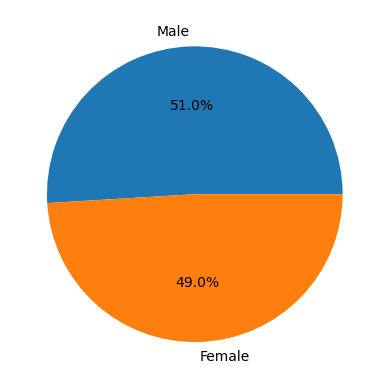

<Figure size 600x600 with 0 Axes>

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gendercount, labels=gendercount.index, autopct="%1.1f%%")
plt.figure(figsize=(6, 6))
plt.show()

## Quartiles, Outliers and Boxplots

In [48]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
promising_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Capomulin, Ramicane, Infubinol, and Ceftamin

grouped_df = cleandf.groupby("Mouse ID").agg({"Timepoint": "max"}).reset_index()
cleanmerge = pd.merge(grouped_df, cleandf, on=["Mouse ID", "Timepoint"], how="left")

# Start by getting the last (greatest) timepoint for each mouse
for drug in promising_regimens:
    cleantime = cleanmerge.find(drug,)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
cleanmerge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


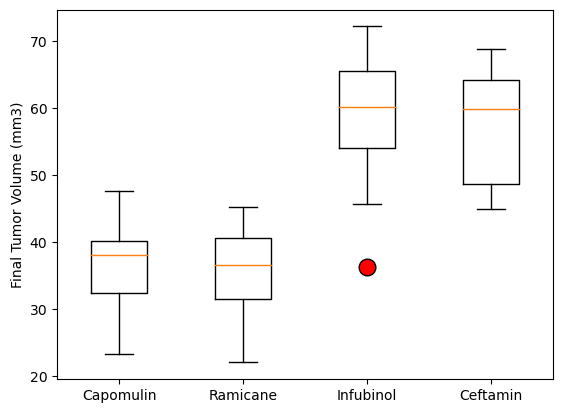

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

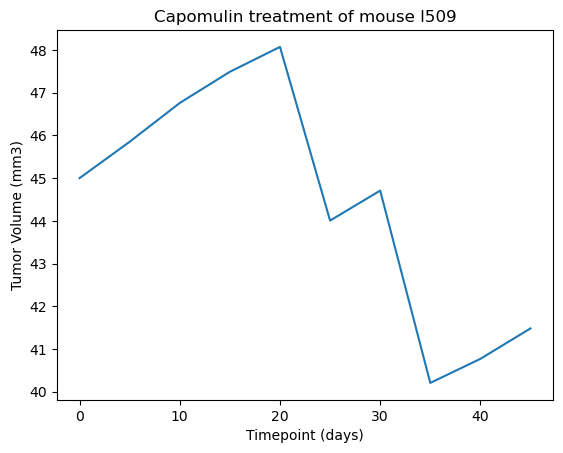

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


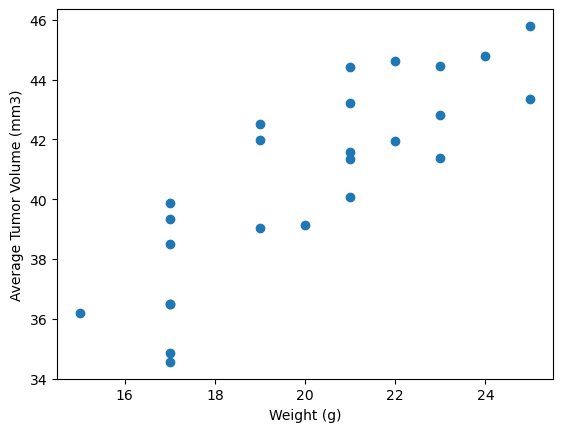

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


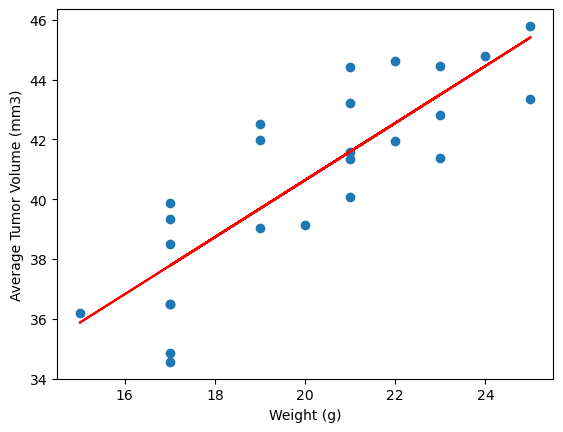

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
